# Making Movies

Author: Mike Wood

Learning Objectives: By the end of this notebook, you should be able to:
1. Create a series of images to use as frames of a movie
2. Compile frames into a movie with Python

**Import the libraries for this notebook**

In [3]:
# import the numpy, matplotlib, parametric curves, and moviepy libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import parametric_curves as pc
import moviepy.video.io.ImageSequenceClip

## Creating Movies
Creating movies out of data is pretty simple - we just need to make the frames of a movie and then stitch them together.

In this notebook, we will create a movie that sketches out a profile of a face using a given function. The profiles will be generated with parametric curves generated by Wolfram Alpha. The curves for many famous people can be viewed on [HERE](https://www.wolframalpha.com/input?i=person+curves&assumption=%22ClashPrefs%22+-%3E+%7B%22PopularCurveClass%22%2C+%22Person%22%7D).

## Creating a *frame*work

To create a movie, first we will need to generate the frames of our movie. Here, we will construct our first image - a testing ground for an eventual function we can update with each timestep to generate the frames.

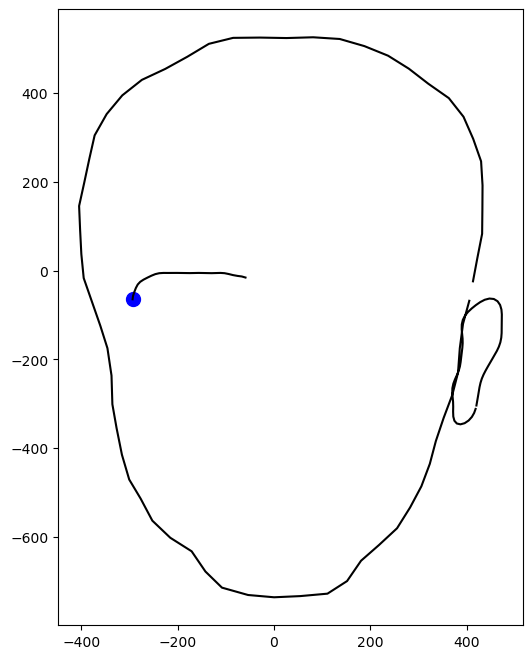

In [5]:
# define a given time between 0 and 60*pi
time = 9*np.pi

# define a timespan up to the given time
t = np.arange(0.01,time,0.1)

# create a figure object
fig = plt.figure(figsize=(6,8))

# read the curve from the module
x, y = pc.equation_1(t)

# plot a blue circle around the last point
plt.plot(x[-1],y[-1],'bo',markersize=10)

# plot the curve
plt.plot(x,y,'k-')

# show the plot
plt.show()

### Updating the image
Next, we'll make the following updates to the image:

- set the axis bounds (-500 to 500 in the x direction, -800 to 600 in the y direction)
- remove the axes

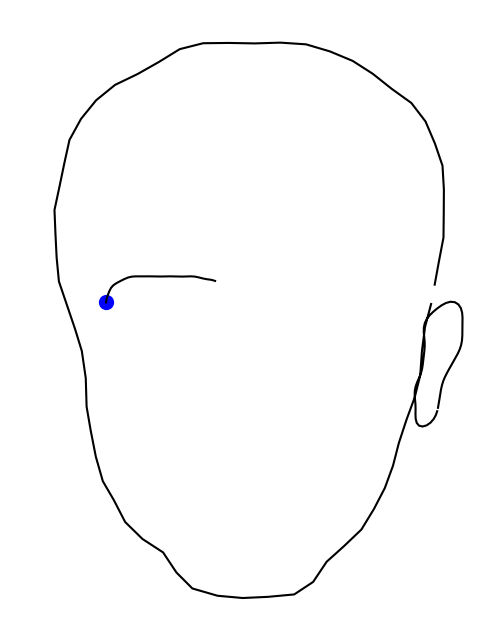

In [6]:
# make these updates in the following plot
# define a given timebetween 0 and 60*pi
time = 9*np.pi

# define a timespan up to the given time
t = np.arange(0.01,time,0.1)

# create a figure object
fig = plt.figure(figsize=(6,8))

# read the curve from the module
x, y = pc.equation_1(t)

# plot a blue circle around the last point
plt.plot(x[-1],y[-1],'bo',markersize=10)

# plot the curve
plt.plot(x,y,'k-')

# set the axis labels
plt.gca().set_xlim([-500, 500])
plt.gca().set_ylim([-800, 600])

# turn off the axes
plt.axis('off')

# show the plot
plt.show()

### Create a function for each frame
Using the code generated above, make a function to generate each panel. The function should take in `time` and an `output_file` path as arguments. Be sure to close each figure after you open them.

In [7]:
# define a frame_function give the time and the output_file
def frame_function(time, output_file):
    # paste the plot code from above
    # define a timespan up to the given time
    t = np.arange(0.01,time,0.01)
    
    # create a figure object
    fig = plt.figure(figsize=(6,8))
    
    # read the curve from the module
    x, y = pc.equation_1(t)
    
    # plot a blue circle around the last point
    plt.plot(x[-1],y[-1],'bo',markersize=10)
    
    # plot the curve
    plt.plot(x,y,'k-')

    plt.gca().set_xlim([-500, 500])
    plt.gca().set_ylim([-800, 600])
    plt.axis('off')

    # save the plot as a figure
    plt.savefig(output_file)

    # close the figure
    plt.close(fig)

Test the file for one timestep here:

In [8]:
# make an output directory if it does not exist
if 'panels_1' not in os.listdir(os.getcwd()):
    os.mkdir(os.path.join(os.getcwd(), 'panels_1'))
    
# test the function
time = 4
output_file = 'panels_1/frame_'+'{:04d}'.format(0)+'.png'
frame_function(time, output_file)

### Make the panels
With the function created and tested, now we can loop through a number of timesteps to generate the image

```
# make a time array
times = np.arange(0.02,np.pi*60,0.2)

# make an empty file list to keep track of the file names
file_paths = []

# loop through the time array to generate the panels
for timestep in range(len(times)):
    time = times[timestep]
    output_file = 'panels_1/frame_'+'{:04d}'.format(timestep)+'.png'
    frame_function(time, output_file)
    file_paths.append(output_file)
```

## Make the movie

```
# sort the file paths (just to be sure they 
# are in the correct order)
file_paths.sort()

# set the frames per second
fps=10

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_paths, fps=fps)

# write the video to a file
clip.write_videofile('Person 1.mp4')
```

<video width="300" height="400" controls>
  <source src="https://github.com/ProfMikeWood/intro_to_python_book/blob/main/data_visualization/Person_1.mov">
Your browser does not support the video tag.
</video>

### &#x1F914; Mini-Exercise
Try it for yourself! See if you can make a movie with the second function provided with the `parametric_curve` module. Thw following information will be helpful:
- the time is 0 to 124$\pi$
- the x bounds are -800 to 800
- the y bounds -1000 to 800